## **DATA CLEANING USING MACHINE LEARNING**

#### **Project Description**:
Data cleaning is the process of fixing or removing incorrect, corrupted, duplicate, or incomplete
data within a dataset. Messy data leads to unreliable outcomes. Cleaning data is an essential
part of data analysis, and demonstrating your data cleaning skills is key to landing a job.

#### APPROACH OF THE PROJECT: Step-wise
    1. Data Integrity: Ensuring the accuracy, consistency, and reliability of data throughout the
       cleaning process.
    2. Missing Data Handling: Dealing with missing values by either imputing them or making
       informed decisions on how to handle gaps in the dataset.
    3. Duplicate Removal: Identifying and eliminating duplicate records to maintain data
       uniqueness.
    4. Standardization: Consistent formatting and units across the dataset for accurate analysis.
       Outlier Detection: Identifying and addressing outliers that may skew analysis or model
       performance.

It is Project 3 Proposal Level-1 of Oaisis infobyte
**DATA**:24 August 2024 

DATASET: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

In [4]:
#------------------------IMPORT BASIC NECESSARY LIBRARIES----------------------------------
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#to keep everything in one plane
%matplotlib inline 

In [5]:
# ################### warnings module in Python provides a way to control how warnings handled within a Python script
import warnings

In [6]:
warnings.filterwarnings('ignore')#ignore the warnings

LOADING THE DATA

In [7]:
#--------------------------------LOADING DATA-----------------------------------------
Data= pd.read_csv('DATA.csv')

DATA INSPECTION - **SANITY CHECKING**

In [8]:
# first 5 rows of the dataset
Data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
## last 5 rows of the dataset
Data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [10]:
#for finding out the shape of the data. it is a attribute not a method
Data.shape

(48895, 16)

In [11]:
#printing the no. of rows and columns
print("Number of Rows are",Data.shape[0])
print("Number of Columns are",Data.shape[1])

Number of Rows are 48895
Number of Columns are 16


In [12]:
#Information About Our Dataset Like #the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [13]:
#to Get Overall Statistics About The Dataset
Data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [14]:
Data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

CHECKING NULL VALUES

In [15]:
#Check Null Values In The Dataset
Data.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [16]:
#Check the sum of Null Values In The Dataset
Data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [17]:
#mode of categorial values
print(Data['name'].mode())
print(Data['host_name'].mode())
print(Data['last_review'].mode())
print(Data['reviews_per_month'].mode())

0    Hillside Hotel
Name: name, dtype: object
0    Michael
Name: host_name, dtype: object
0    2019-06-23
Name: last_review, dtype: object
0    0.02
Name: reviews_per_month, dtype: float64


In [18]:
#fill the missing categorial values with modes
Data['name'].fillna(str(Data['name'].mode().values[0]),inplace=True)
Data['host_name'].fillna(str(Data['host_name'].mode().values[0]),inplace=True)
Data['last_review'].fillna(str(Data['last_review'].mode().values[0]),inplace=True)
Data['reviews_per_month'].fillna(str(Data['reviews_per_month'].mode().values[0]),inplace=True)

In [19]:
#count the number of null values in each column
Data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [20]:
#finding percentage of misssing values
Data.isnull().sum()/Data.shape[0]*100

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

no missing values

#### ==============================CHECK DUPLICACY==============================

In [21]:
#to check duplicate values in dataset
Data.duplicated().any()

False

There is no duplicate values present

#### =================================CHECK GARBAGE VALUES=====================================

In [22]:
for i in Data.select_dtypes(include="object").columns:
    print(Data[i].value_counts())
    print("***"*10)

name
Hillside Hotel                                        34
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Private Room                                          11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47905, dtype: int64
******************************
host_name
Michael              438
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: count

### ======================EXPLORATORY DATA ANALYSIS=========================

In [23]:
#descriptive analysis
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [24]:
Data.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,reviews_per_month
count,48895,48895,48895,48895,48895,48895,48895
unique,47905,11452,5,221,3,1764,938
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23,0.02
freq,34,438,21661,3920,25409,11465,10052


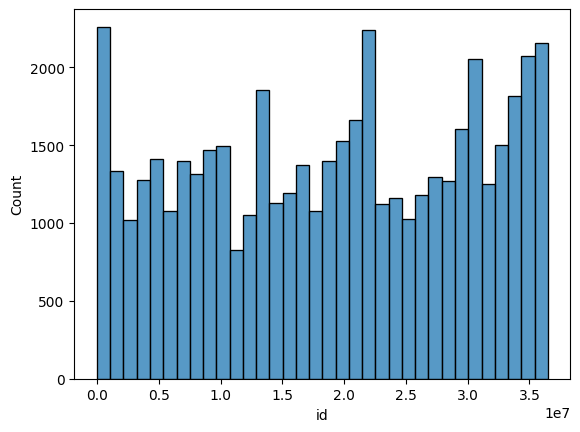

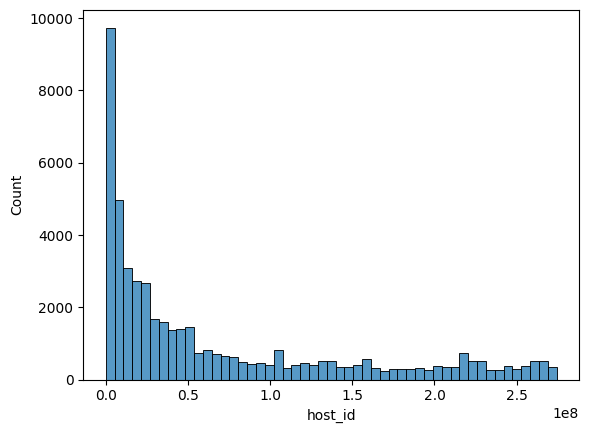

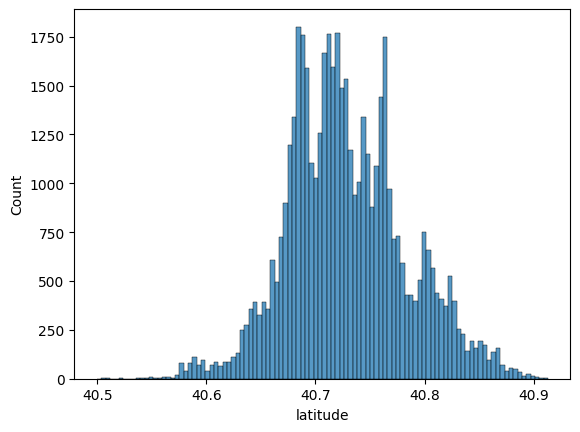

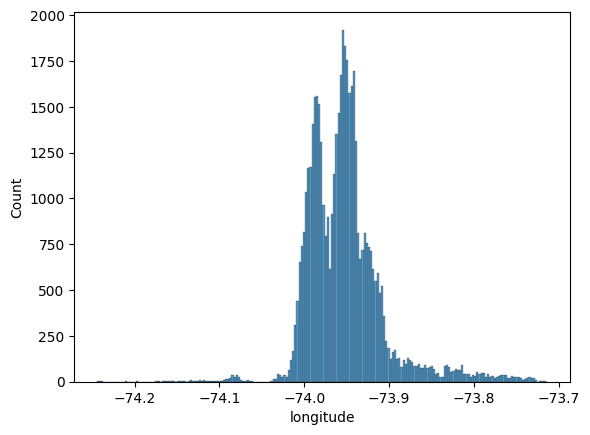

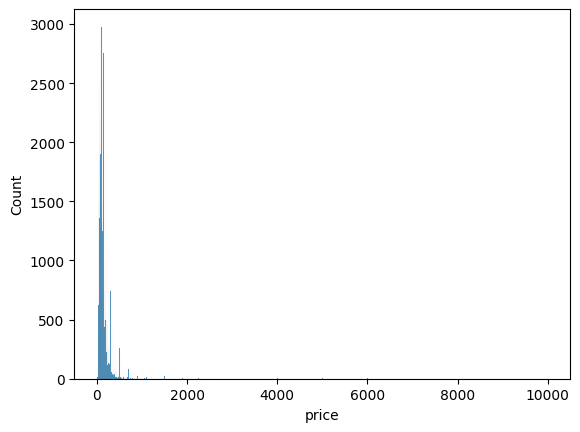

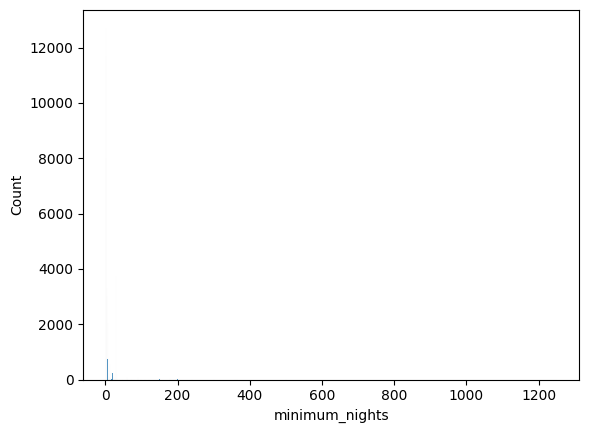

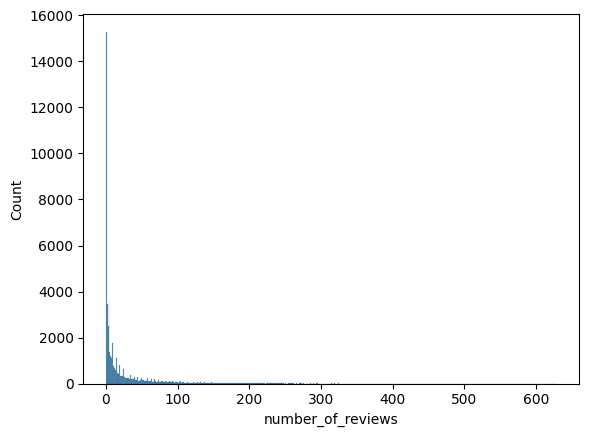

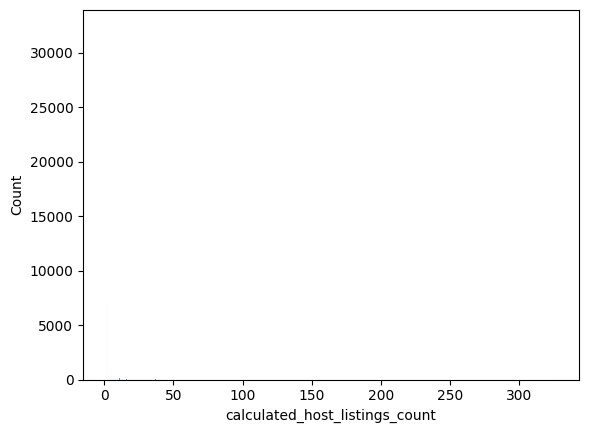

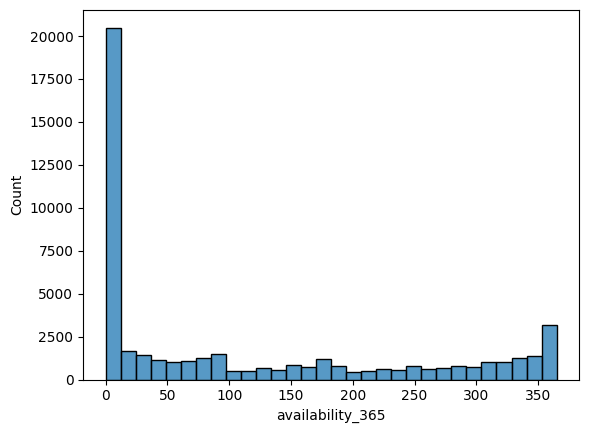

In [25]:
#understanding the distrbution using histogram
for i in Data.select_dtypes(include="number").columns:
    sns.histplot(data=Data,x=i)
    plt.show()

#### =====================IDENTIFY OUTLIERS=======================

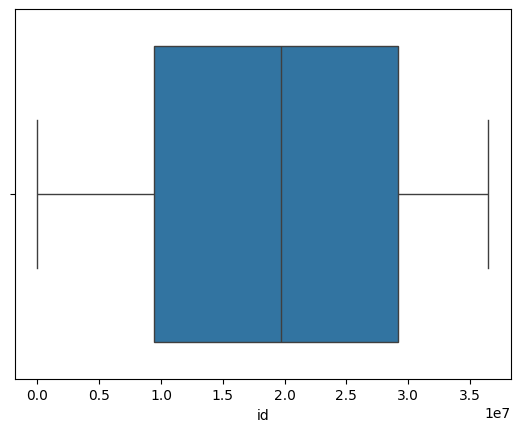

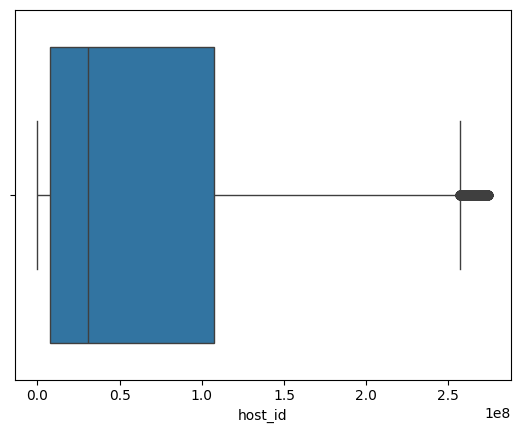

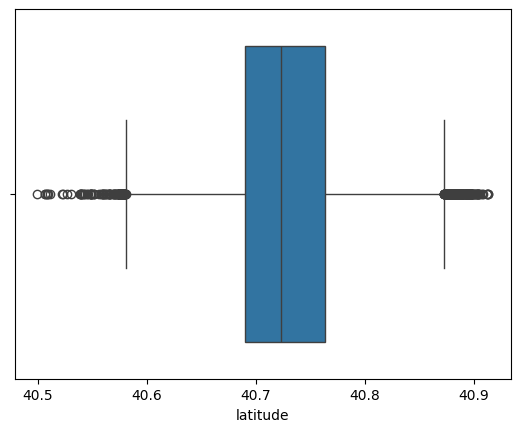

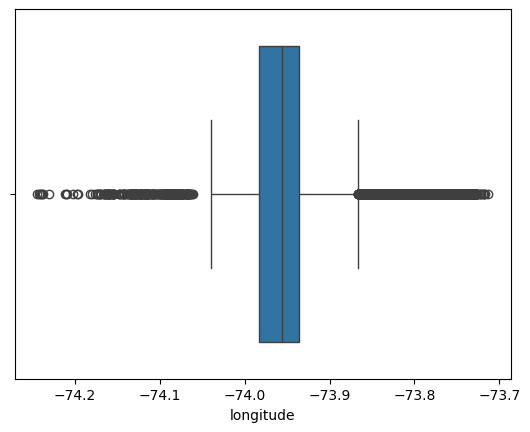

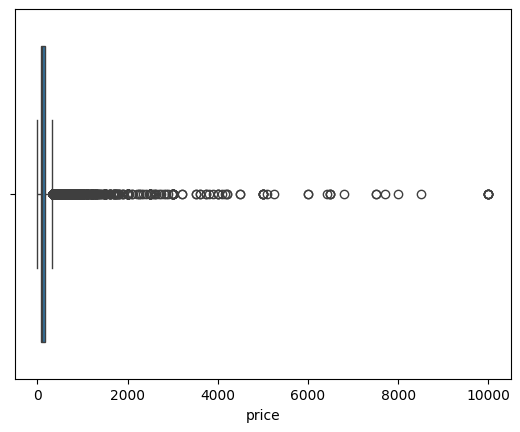

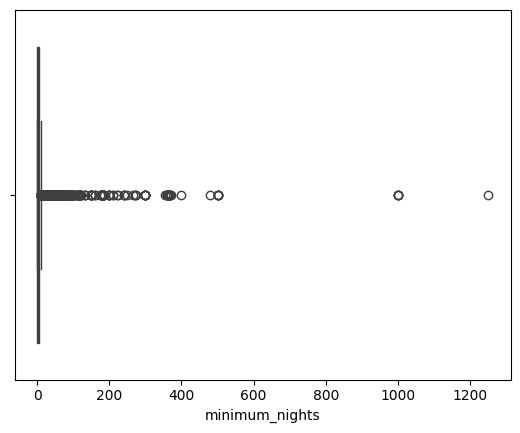

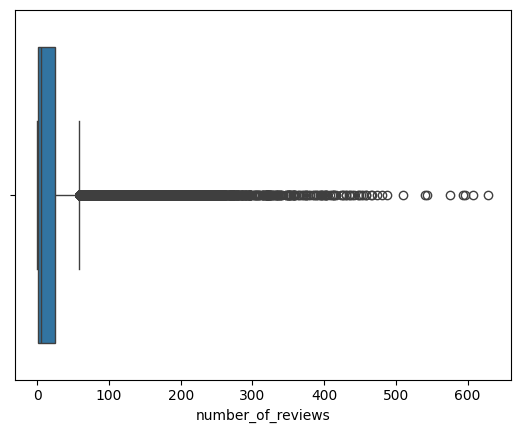

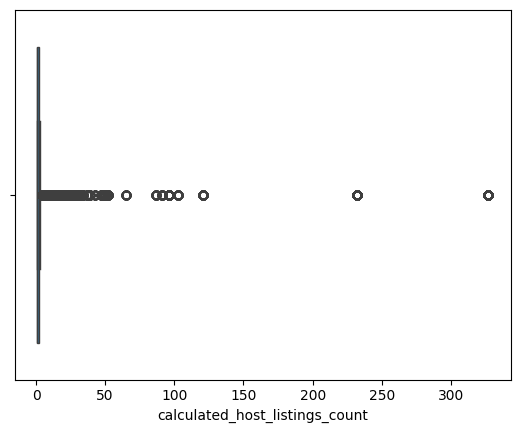

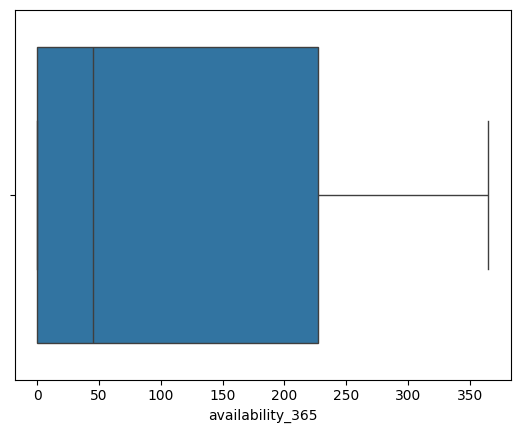

In [26]:
#using BOXPLOT
for i in Data.select_dtypes(include="number").columns:
    sns.boxplot(data=Data,x=i)
    plt.show()

#### =============================UNDERSTANDING THE RELATIONSHIP============================

In [27]:
#using SCATTER PLOT
Data.select_dtypes(include="number").columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

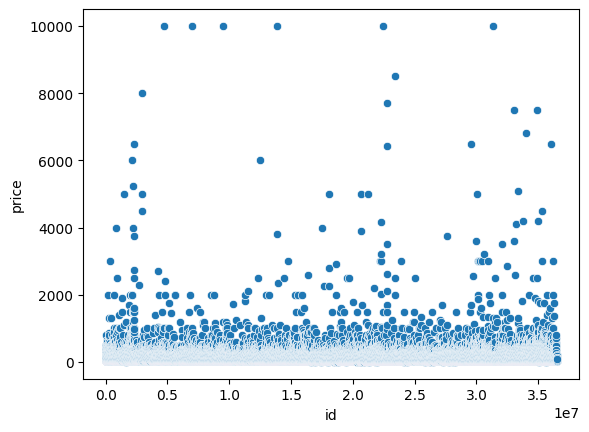

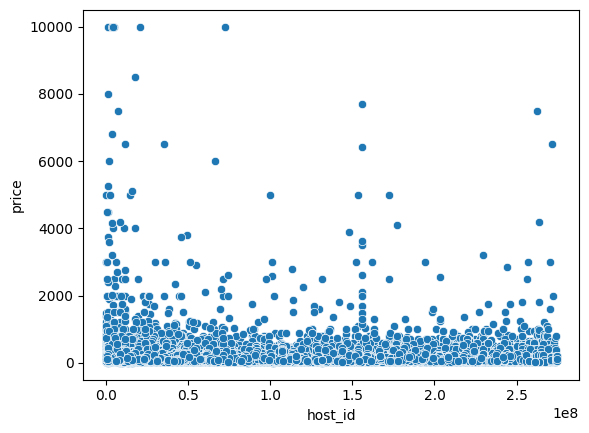

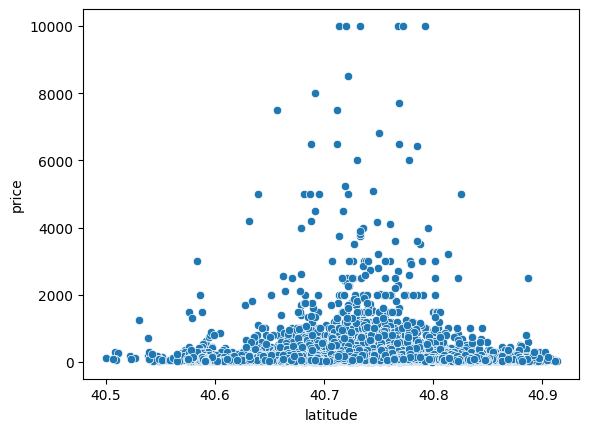

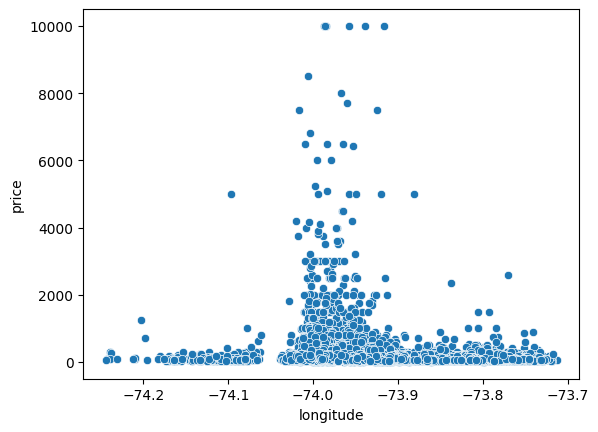

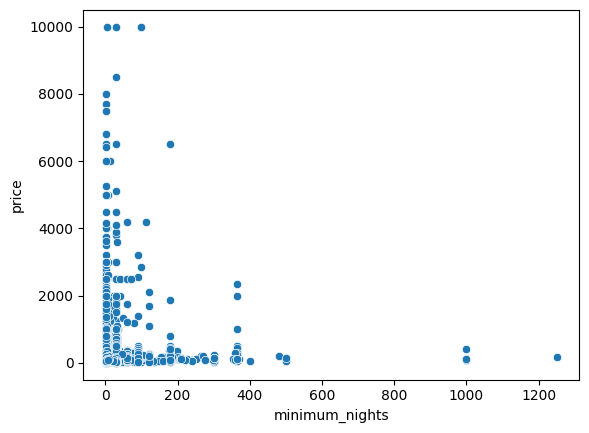

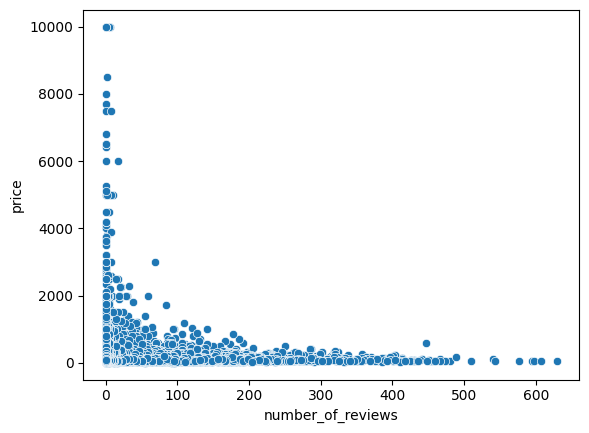

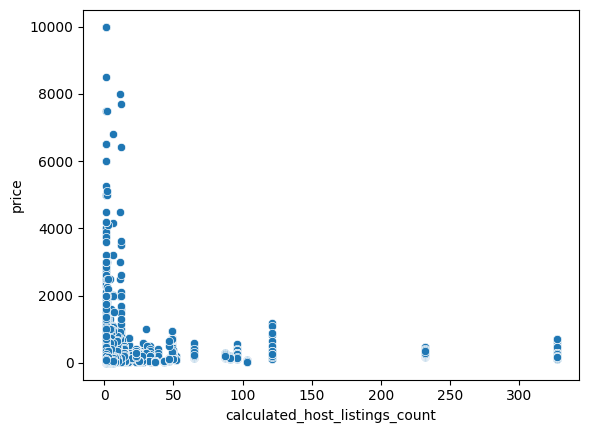

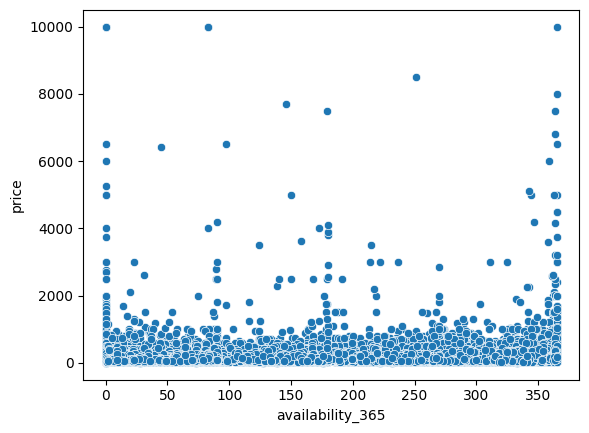

In [28]:
for i in ['id', 'host_id', 'latitude', 'longitude','minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365']:
   sns.scatterplot(data=Data,x=i,y='price')
   plt.show()

#### =======================Correlation ============================

In [32]:
#this will be shown by heatmap
H=Data.select_dtypes(include="number").corr()

In [33]:
H

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,-0.072376,0.172028
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.225701,1.000000


<Axes: >

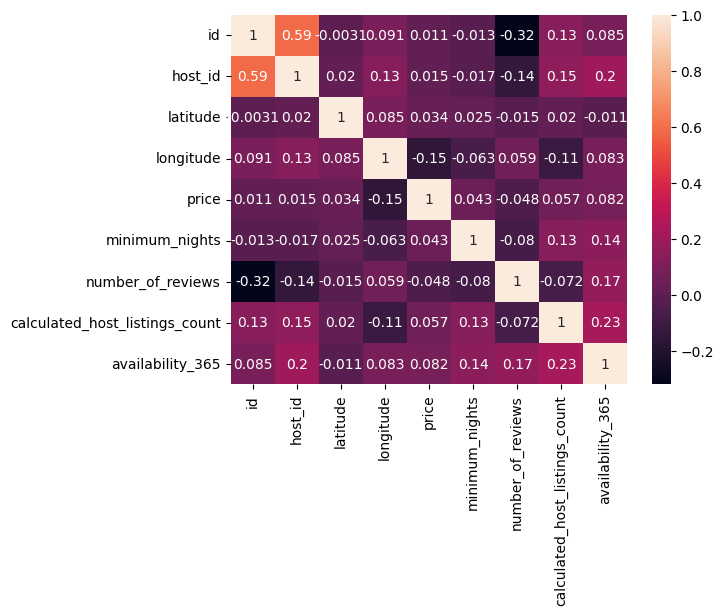

In [36]:
sns.heatmap(H,annot=True)

### ========================OUTLIERS solving==============================

In [37]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [40]:
whisker(Data['price'])

(-90.0, 334.0)

In [38]:
Data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [42]:
pd.get_dummies(data=Data,columns=['price','room_type'],drop_first=True)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,minimum_nights,number_of_reviews,...,price_6500,price_6800,price_7500,price_7703,price_8000,price_8500,price_9999,price_10000,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,1,9,...,False,False,False,False,False,False,False,False,True,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,1,45,...,False,False,False,False,False,False,False,False,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,3,0,...,False,False,False,False,False,False,False,False,True,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,1,270,...,False,False,False,False,False,False,False,False,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,10,9,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,2,0,...,False,False,False,False,False,False,False,False,True,False
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,4,0,...,False,False,False,False,False,False,False,False,True,False
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,10,0,...,False,False,False,False,False,False,False,False,False,False
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,1,0,...,False,False,False,False,False,False,False,False,False,True


================================================THANKYOU===============================================

for queries mail at: ranisoni6298@gmail.com